In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv("/content/MatNavi Mechanical properties of low-alloy steels (1).csv")

In [ ]:
train.head

<bound method NDFrame.head of     Alloy code     C    Si    Mn      P      S     Ni    Cr     Mo    Cu  \
0          MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04   
1          MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04   
2          MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04   
3          MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04   
4          MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04   
..         ...   ...   ...   ...    ...    ...    ...   ...    ...   ...   
910        CCB  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01   
911        CCB  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01   
912        CCB  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01   
913        CCB  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01   
914        CCB  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01   

         V     Al       N  Ceq  Nb + Ta   Temperature (°C

In [ ]:
y_train = y = train['yield_strength']
train.drop("Alloy code", axis = 1, inplace = True)

In [ ]:
train.select_dtypes(include=['int64','float64'])

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),yield_strength
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,27,342
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,100,338
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,200,337
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,300,346
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,400,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,350,268
911,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,400,244
912,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,450,224
913,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,500,209


In [ ]:
train.select_dtypes(include=['object'])

""
0
1
2
3
4
...
910
911
912
913


In [ ]:
categorical=len(train.select_dtypes(include=['object']).columns)
numbers=len(train.select_dtypes(include=['float64','int64']).columns)
print("Total number of Categorical Data is:",categorical)
print("Total number of Numerical Data is:",numbers)
print("Total Features are:",categorical+numbers)

Total number of Categorical Data is: 0
Total number of Numerical Data is: 16
Total Features are: 16


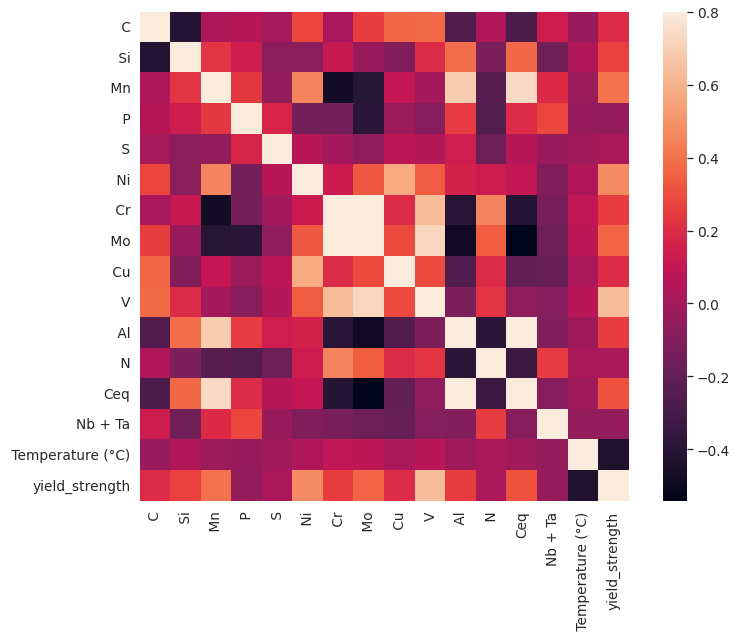

In [ ]:
corrmat=train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

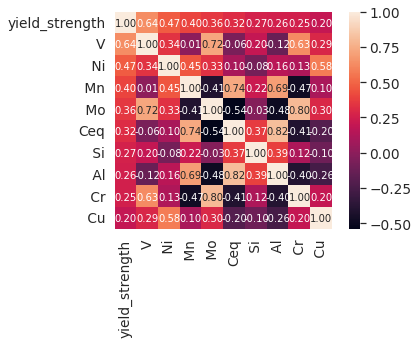

In [ ]:
k = 10 #number of variables for heatmap
c = corrmat.nlargest(k, 'yield_strength')['yield_strength'].index
cm = np.corrcoef(train[c].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=c.values, xticklabels=c.values)
plt.show()

In [ ]:
y_train.shape
y.shape

(915,)

In [ ]:
x_train=train.values
# x_test=test.values
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=0) 


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

import lightgbm as lgbm


import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
kfold = KFold(n_splits=10, random_state = 77, shuffle = True)

In [ ]:
# LightGBM Grid Search
params = {
    'task' : 'train',
    'objective' : 'regression',
    'subsample' : 0.8,
    'max_depth' : 7
}

param_grid = {
    'learning_rate': [0.1],
    'feature_fraction' : [0.5, 0.8],
    'num_leaves':[31, 63, 127]
}

lgbm_model = lgbm.LGBMRegressor(**params, verbose=-1)

lgbm_grid  = GridSearchCV(lgbm_model, 
                          param_grid, 
                          cv=kfold, 
                          scoring='neg_mean_squared_error', 
                          return_train_score=True)

lgbm_grid.fit(x_train, y_train)

r2_score(lgbm_grid.predict(x_train), y_train)

lgbm_model.fit(x_train,y_train)

LGBMRegressor(max_depth=7, objective='regression', subsample=0.8, task='train',
              verbose=-1)

In [ ]:
y_test_pred=lgbm_model.predict(x_test)

In [ ]:
r2_LGBM = r2_score(y_test, y_test_pred)
mse_LGBM = mean_squared_error(y_test, y_test_pred)
mae_LGBM = mean_absolute_error(y_test, y_test_pred)

In [ ]:
print("Accuracy")
print(1-mae_LGBM/np.mean(y_test))
mse_scaled_LGBM = mse_LGBM/np.mean(y_test)
mae_scaled_LGBM = mae_LGBM/np.mean(y_test)

Accuracy
0.9955436867470632


In [ ]:

print('R\u00b2_score = ' + str(r2_LGBM) + ' Higher is better')
print('mean_squared_error = ' + str((mse_scaled_LGBM, 2)) + '    Lower is better')
print('mean_absolute_error = ' + str((mae_scaled_LGBM, 2)) + '   Lower is better')

R²_score = 0.9990141037152802 Higher is better
mean_squared_error = (0.048179502307770385, 2)    Lower is better
mean_absolute_error = (0.004456313252936851, 2)   Lower is better


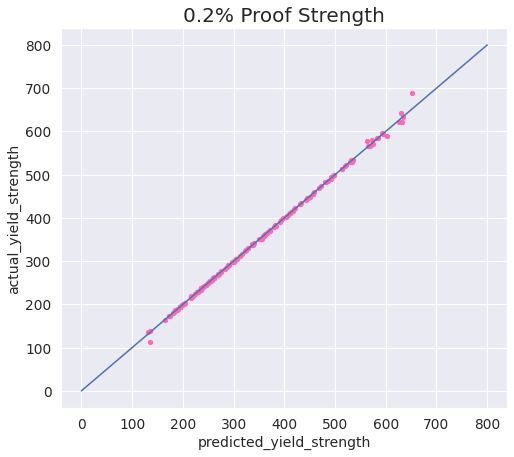

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Plotting graphs for 0.2% Proof Strength and Tensile Strength
fig, (ax0) = plt.subplots(1,figsize=(8,7))

ax0.scatter(y_test_pred, y_test, color = 'hotpink', s=18)
x3 = np.linspace(0, 800, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('0.2% Proof Strength', fontsize = 20)
ax0.set_xlabel('predicted_yield_strength', fontsize = 14)
ax0.set_ylabel('actual_yield_strength', fontsize = 14)

# ax1.scatter(nn_predicted_tensile_strength, actual_tensile_strength, color = 'hotpink', s=18)
# x4 = np.linspace(100, 900, 1000)
# y4 = x4
# ax1.plot(x4, y4)
# ax1.set_title('Tensile Strength', fontsize = 20)
# ax1.set_xlabel('predicted_tensile_strength', fontsize = 14)
# ax1.set_ylabel('actual_tensile_strength', fontsize = 14)

plt.show()